1. Main objective of the analysis that also specifies whether your model will be focused on clustering or dimensionality reduction and the benefits that your analysis brings to the business or stakeholders of this data.

2. Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.

3. Brief summary of data exploration and actions taken for data cleaning orfeature engineering.

4. Summary of training at least three variations of the unsupervised model you selected. For example, you can use different clustering techniques or different hyperparameters.

5. A paragraph explaining which of your Unsupervised Learning models you recommend as a final model that best fits your needs in terms.

6. Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.

7. Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.

Main objective of the analysis that also specifies whether your model will be focused on clustering or dimensionality reduction and the benefits that your analysis brings to the business or stakeholders of this data.

Clustering

Predict automobile price

Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.

1.  symboling: -3, -2, -1, 0, 1, 2, 3 (Cars are initially assigned a
    risk factor symbol associated with its price. Then, if it is more
    risky (or less), this symbol is adjusted by moving it up (or down)
    the scale. Actuarians call this process "symboling". A value of +3
    indicates that the auto is risky, -3 that it is probably pretty
    safe.)
2.  make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu,
    jaguar, mazda, mercedes- benz, mercury, mitsubishi, nissan, peugot,
    plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
3.  fuel-type: diesel, gas.
4.  aspiration: std, turbo.
5.  num-of-doors: four, two.
6.  body-style: hardtop, wagon, sedan, hatchback, convertible.
7.  drive-wheels: 4wd, fwd, rwd.
8.  engine-location: front, rear.
9.  wheel-base: continuous from 86.6 120.9.
10. length: continuous from 141.1 to 208.1. 11 width: continuous from
    60.3 to 72.3.
11. height: continuous from 47.8 to 59.8.
12. curb-weight: continuous from 1488 to 4066.
13. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
14. num-of-cylinders: eight, five, four, six, three, twelve, two.
15. engine-size: continuous from 61 to 326.
16. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
17. bore: continuous from 2.54 to 3.94.
18. stroke: continuous from 2.07 to 4.17.
19. compression-ratio: continuous from 7 to 23.
20. horsepower: continuous from 48 to 288.

Brief summary of data exploration and actions taken for data cleaning orfeature engineering.

In [1]:
    import pandas as pd
    import numpy as np

In [2]:
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.set(style="white", color_codes=True)

In [4]:
automobile_price = pd.read_csv('AutoData.csv')

In [5]:
automobile_price.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
automobile_price.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [7]:
automobile_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [8]:
automobile_price.shape

(205, 25)

In [9]:
automobile_price.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
automobile_price.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [11]:
automobile_price['symboling'].astype('category').value_counts()

0     67
1     54
2     32
3     27
-1    22
-2     3
Name: symboling, dtype: int64

In [12]:
automobile_price['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [13]:
automobile_price['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

c:\Users\vijay\anaconda3\envs\data_science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wheelbase', ylabel='Density'>

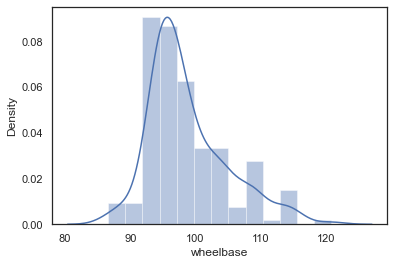

In [14]:
sns.distplot(automobile_price['wheelbase'])

c:\Users\vijay\anaconda3\envs\data_science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='curbweight', ylabel='Density'>

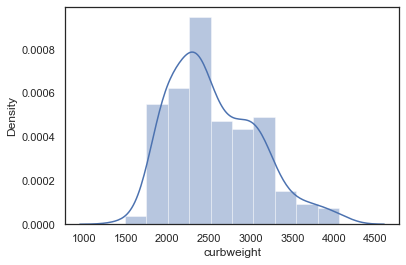

In [15]:
sns.distplot(automobile_price['curbweight'])

<AxesSubplot:xlabel='carbody', ylabel='price'>

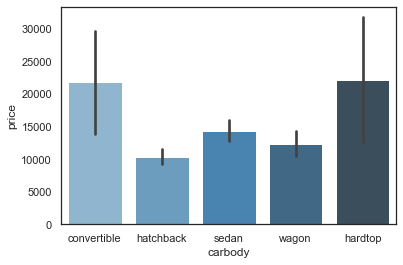

In [16]:
sns.barplot(x="carbody", y="price", data=automobile_price, palette="Blues_d")

<AxesSubplot:xlabel='drivewheel', ylabel='price'>

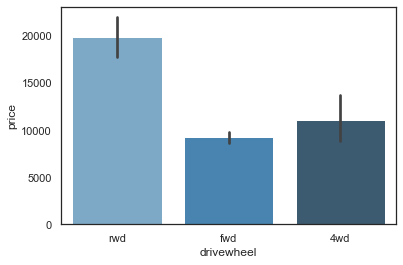

In [17]:
sns.barplot(x="drivewheel", y="price", data=automobile_price, palette="Blues_d")

c:\Users\vijay\anaconda3\envs\data_science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stroke', ylabel='Density'>

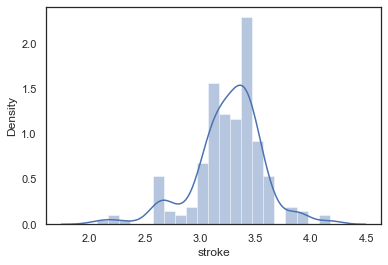

In [18]:
sns.distplot(automobile_price['stroke'])

c:\Users\vijay\anaconda3\envs\data_science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='compressionratio', ylabel='Density'>

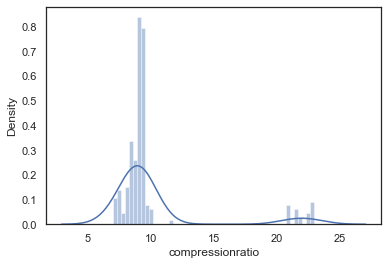

In [19]:
sns.distplot(automobile_price['compressionratio'])

c:\Users\vijay\anaconda3\envs\data_science\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


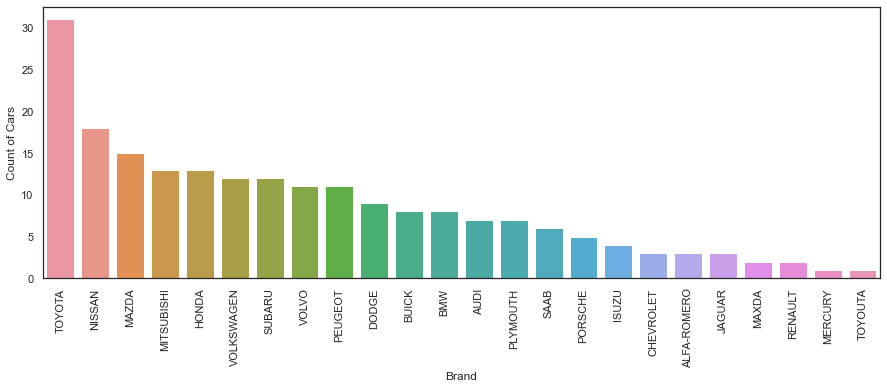

<Figure size 432x288 with 0 Axes>

In [20]:
automobile_price['brand'] = automobile_price.make.str.split(' ').str.get(0).str.upper()
automobile_price['brand'] = automobile_price['brand'].replace(['VW', 'VOKSWAGEN'], 'VOLKSWAGEN')
automobile_price['brand'] = automobile_price['brand'].replace(['PORCSHCE'], 'PORSCHE')
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(automobile_price['brand'], order=pd.value_counts(automobile_price['brand']).index,)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
plt.xticks(rotation = 90)
plt.show()
plt.tight_layout()

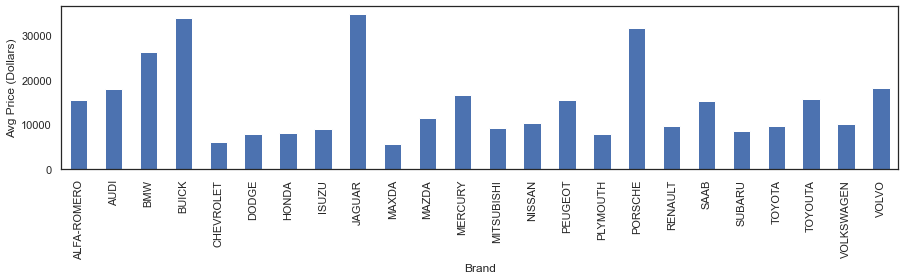

In [21]:
automobile_price_comp_avg_price = automobile_price[['brand','price']].groupby("brand", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
plt1 = automobile_price_comp_avg_price.plot(x = 'brand', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("Brand")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 90)
plt.show()

Summary of training at least three variations of the unsupervised model you selected. For example, you can use different clustering techniques or different hyperparameters.

In [22]:
X=automobile_price.drop(columns=['carbody'])
y=automobile_price['carbody']

In [23]:
automobile_price_categorical = X.select_dtypes(include=['object'])
automobile_price_categorical.head()

,make,fueltype,aspiration,doornumber,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,brand
0,alfa-romero giulia,gas,std,two,rwd,front,dohc,four,mpfi,ALFA-ROMERO
1,alfa-romero stelvio,gas,std,two,rwd,front,dohc,four,mpfi,ALFA-ROMERO
2,alfa-romero Quadrifoglio,gas,std,two,rwd,front,ohcv,six,mpfi,ALFA-ROMERO
3,audi 100 ls,gas,std,four,fwd,front,ohc,four,mpfi,AUDI
4,audi 100ls,gas,std,four,4wd,front,ohc,five,mpfi,AUDI


In [24]:
cars_dummies = pd.get_dummies(automobile_price_categorical, drop_first=True)
cars_dummies.head()

,make_alfa-romero Quadrifoglio,make_alfa-romero giulia,make_alfa-romero stelvio,make_audi 100 ls,make_audi 100ls,make_audi 4000,make_audi 5000,make_audi 5000s (diesel),make_audi fox,make_bmw 320i,...,brand_PEUGEOT,brand_PLYMOUTH,brand_PORSCHE,brand_RENAULT,brand_SAAB,brand_SUBARU,brand_TOYOTA,brand_TOYOUTA,brand_VOLKSWAGEN,brand_VOLVO
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
X=X.drop(columns=automobile_price_categorical)
X.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [26]:
cars_dummies.columns

Index(['make_alfa-romero Quadrifoglio', 'make_alfa-romero giulia',
       'make_alfa-romero stelvio', 'make_audi 100 ls', 'make_audi 100ls',
       'make_audi 4000', 'make_audi 5000', 'make_audi 5000s (diesel)',
       'make_audi fox', 'make_bmw 320i',
       ...
       'brand_PEUGEOT', 'brand_PLYMOUTH', 'brand_PORSCHE', 'brand_RENAULT',
       'brand_SAAB', 'brand_SUBARU', 'brand_TOYOTA', 'brand_TOYOUTA',
       'brand_VOLKSWAGEN', 'brand_VOLVO'],
      dtype='object', length=194)

In [27]:
dfX=pd.merge(X,cars_dummies,on=X.index)
dfX.columns

Index(['key_0', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke',
       ...
       'brand_PEUGEOT', 'brand_PLYMOUTH', 'brand_PORSCHE', 'brand_RENAULT',
       'brand_SAAB', 'brand_SUBARU', 'brand_TOYOTA', 'brand_TOYOUTA',
       'brand_VOLKSWAGEN', 'brand_VOLVO'],
      dtype='object', length=210)

In [28]:
dfX.drop(columns='key_0',inplace=True)
dfX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Columns: 209 entries, symboling to brand_VOLVO
dtypes: float64(8), int64(7), uint8(194)
memory usage: 64.5 KB


In [29]:
X

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [30]:
y

0      convertible
1      convertible
2        hatchback
3            sedan
4            sedan
          ...     
200          sedan
201          sedan
202          sedan
203          sedan
204          sedan
Name: carbody, Length: 205, dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 2, 3, 3, 3, 3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2,
       2, 2, 2, 3, 3, 3, 4, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3,
       3, 3, 4, 1, 3, 3, 0, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 3, 2, 3, 4, 1, 2, 3, 3, 4, 3, 2, 2, 2, 3, 3, 4,
       4, 3, 3, 4, 4, 3, 3, 3, 2, 2, 2, 3, 3, 4, 2, 2, 1, 1, 0, 2, 4, 2,
       2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 2, 2, 2, 4,
       4, 4, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 1, 1, 2, 1, 2, 0, 3, 3, 2,
       3, 2, 2, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 3, 3, 3, 3])

### K-Means Clustering

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [37]:
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [45]:
from sklearn.cluster import KMeans
km = KMeans(5)
km.fit(X_train)

KMeans(n_clusters=5)

In [47]:
km.inertia_

350654238.21068555

c:\Users\vijay\anaconda3\envs\data_science\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


Text(0, 0.5, 'Inertia')

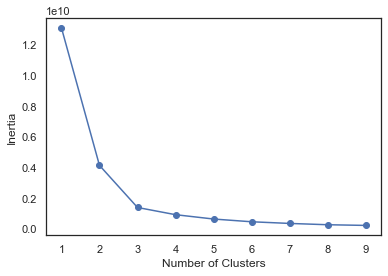

In [52]:
inertia = []
list_num_clusters = list(range(1,10))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

### Hierarchical Agglomerative Clustering

In [55]:
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=5, linkage='ward', compute_full_tree=True)
ag = ag.fit(X)
ag.fit_predict(X)

array([3, 4, 4, 3, 4, 4, 4, 4, 1, 4, 4, 4, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 3, 0, 0, 0, 2, 2, 2, 2, 2, 3, 3, 3, 4, 2, 2, 3, 2, 3, 3, 4,
       4, 1, 1, 1, 0, 0, 0, 0, 0, 4, 2, 2, 2, 2, 2, 2, 3, 4, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 3, 1, 0, 0, 0, 0, 2, 2,
       3, 3, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 2, 3, 2,
       3, 3, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 1, 1, 1], dtype=int64)

In [57]:
import seaborn as sns
coloribm = {"Magenta 100":"2A0A16", "Magenta 90":"57002B", "Magenta 80":"760A3A", "Magenta 70":"A11950", "Magenta 60":"D12765", "Magenta 50":"EE538B", "Magenta 40":"FA75A6", "Magenta 30":"FFA0C2", "Magenta 20":"FFCFE1", "Magenta 10":"FFF0F6", "Purple 100":"1E1033", "Purple 90":"38146B", "Purple 80":"4F2196", "Purple 70":"6E32C9", "Purple 60":"8A3FFC", "Purple 50":"A66EFA", "Purple 40":"BB8EFF", "Purple 30":"D0B0FF", "Purple 20":"E6D6FF", "Purple 10":"F7F1FF", "Blue 100":"051243", "Blue 90":"061F80", "Blue 80":"0530AD", "Blue 70":"054ADA", "Blue 60":"0062FF", "Blue 50":"408BFC", "Blue 40":"6EA6FF", "Blue 30":"97C1FF", "Blue 20":"C9DEFF", "Blue 10":"EDF4FF", "Teal 100":"081A1C", "Teal 90":"003137", "Teal 80":"004548", "Teal 70":"006161", "Teal 60":"007D79", "Teal 50":"009C98", "Teal 40":"00BAB6", "Teal 30":"20D5D2", "Teal 20":"92EEEE", "Teal 10":"DBFBFB", "Gray 100":"171717", "Gray 90":"282828", "Gray 80":"3D3D3D", "Gray 70":"565656", "Gray 60":"6F6F6F", "Gray 50":"8C8C8C", "Gray 40":"A4A4A4", "Gray 30":"BEBEBE", "Gray 20":"DCDCDC", "Gray 10":"F3F3F3"} 
colors = []
colornum = 60
for i in [f'Blue {colornum}', f'Teal {colornum}', f'Magenta {colornum}', f'Purple {colornum}', f'Gray {colornum}']:
    colors.append(f'#{coloribm[i]}')
palette = sns.color_palette(colors)

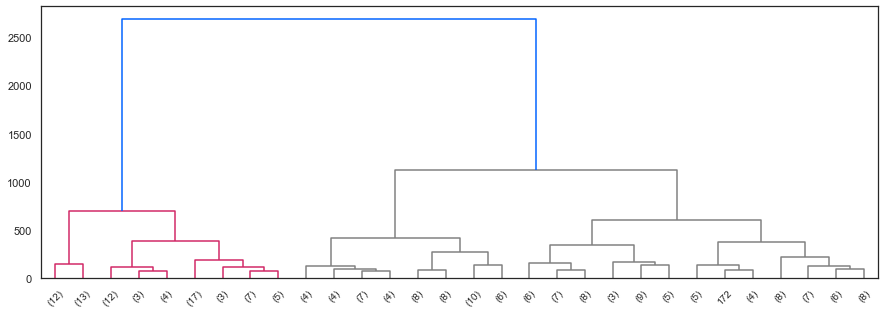

In [58]:
# First, we import the cluster hierarchy module from SciPy (described above) to obtain the linkage and dendrogram functions.
from scipy.cluster import hierarchy

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

# Some color setup
red = colors[2]
blue = colors[0]

hierarchy.set_link_color_palette([red, 'gray'])

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color=blue)

A paragraph explaining which of your Unsupervised Learning models you recommend as a final model that best fits your needs in terms.

Looking at the performance of K-Means clustering and Hierarchical Agglomerative Clustering, we can see that both of these algorithms are able to cluster the data into five clusters. Earlier, we saw the data has five distinct classes during data exploration stage. We can use elbow method to find the optimal number of clusters for K-Means clustering which has a steep curve at the number of clusters = 4. This would be the optimal method that can be suggested.

Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.

1. The target variable price has a positive skew, however majority of the cars are low priced.
2. More than 50% of the cars (around 105-107 out of total of 205) are priced 10,000 and close to 35% cars are priced between 10,000 and 20,000. So around 85% of cars in US market are priced between 5,000 to 20,000.
3. Based on above observations and graph on right side (KDE/green one) it appears there are 2 distributions one for cars priced between 5,000 and 25000 and another distribution for high priced cars 25,000 and above. (Notice the approximate bell curve
from little less than 30000 upto 45,000/50,000)

Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.